## Correr el encabezado antes de comenzar para cargar todas las funiones

In [1]:
#Encabezado del archivo
import os,csv
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

#Filtros de String para dataframe
#Variante para una columna

def sfilter_by_col(df_query,col_name,text,has=True):
    df_return = df_query.loc[df_query[col_name].str.contains(text)==has]
    return df_return

def sfilter_linage(df_query,text,has=True):
    df_return = df_query.loc[df_query["Linage"].str.contains(text)==has]
    return df_return


def sfilter_org(df_query,text,has=True):
    df_return = df_query.loc[df_query["Organism"].str.contains(text)==has]
    return df_return

def sfilter_by_uniprot(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return df_return


def get_pdb_list_from_df(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return_list = filter_by_uniprot(df_proteins_celular,"P04637").iloc[0]["PDB_CHAIN_LIST"]
    return return_list

def printd(text):
    display(Markdown(text))
    return

def strlen(x):
    return str(len(x))

def check_not_None(thing):
    if type(thing) != type (None):
        return True
    else:
        return False


printd("### Funciones cargagadas correctamente, puede continuar.")

### Funciones cargagadas correctamente, puede continuar.

# Correr el main para generar el Informe Base



# Fercha del informe 2019-10-17

## Reading swissprot

Dataframe size: 560459

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs
0,Q0ATK2,ACCD_MARMM,reviewed,Acetyl-coenzyme A carboxylase carboxyl transfe...,accD Mmar10_0089,Maricaulis maris (strain MCS10),311,"cellular organisms, Bacteria, Proteobacteria, ...",MTEKSNGMSWLSKITPPGMSKIFSKRDTPDNLWVKCPVSEEMVFHK...,394221
1,O40976,1A_CMVNT,reviewed,Replication protein 1a [Includes: ATP-dependen...,ORF1a,Cucumber mosaic virus (strain NT9) (CMV),993,"Viruses, Riboviria, Bromoviridae, Cucumovirus,...",MATSSFNINELVASHGDKGLLATALVDKTAHEQLEEQLQHQRRGRK...,117124
2,Q84P24,4CLL6_ARATH,reviewed,4-coumarate--CoA ligase-like 6 (EC 6.2.1.-) (4...,4CLL6 At4g19010 F13C5.180,Arabidopsis thaliana (Mouse-ear cress),566,"cellular organisms, Eukaryota, Viridiplantae, ...",MAATHLHIPPNPKTQTSHQNPPFWFSSKTGIYTSKFPSLHLPVDPN...,3702
3,P62260,1433E_RAT,reviewed,14-3-3 protein epsilon (14-3-3E) (Mitochondria...,Ywhae,Rattus norvegicus (Rat),255,"cellular organisms, Eukaryota, Opisthokonta, M...",MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,10116
4,P0CK20,A25_VACCC,reviewed,Protein A2.5,A2.5L,Vaccinia virus (strain Copenhagen) (VACV),76,"Viruses, Poxviridae, Chordopoxvirinae, Orthopo...",MSWYEKYNIVLNPPKRCSSACADNLTTILAEDGNHIRAILYSQPKK...,10249


## Reading PDBSWS

swslist dataframe size: 47097

,UNIPROT_ID,PDB_CHAIN_LIST,pdb_chain_count
0,A0A010,"[5B00_A, 5B00_B, 5B00_C, 5B01_A, 5B01_B, 5B01_...",57
1,A0A011,"[3VK5_A, 3VK5_B, 3VKA_A, 3VKA_B, 3VKB_A, 3VKB_...",10
2,A0A585,[4MNQ_E],1
3,A0A5A3,"[4UDT_B, 4UDU_B]",2
4,A0A5B3,"[5NHT_B, 5NQK_B]",2


# Merge Sprot with SWS

Dataframe size: 26550

,Length,Taxonomic lineage IDs,pdb_chain_count
count,26550.000000,2.655000e+04,26550.000000
mean,454.547081,1.216896e+05,10.030245
std,545.239279,1.946628e+05,30.223010
min,5.000000,1.700000e+01,1.000000
25%,188.000000,9.606000e+03,2.000000
50%,328.000000,1.009000e+04,4.000000
75%,529.000000,2.089640e+05,8.000000
max,34350.000000,2.510777e+06,1084.000000


# Resumen de informacion del conjunto de proteinas a estudiar

Viruses Dataframe size: 567

Celular Dataframe size: 10165

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bacteria dataframe size: 3694

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Archaea dataframe size: 418

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eukaryota dataframe size: 6053

# Graficos del dataframe de trabajo( Organismos Celulares)

## Histograma de Length menores a 3000

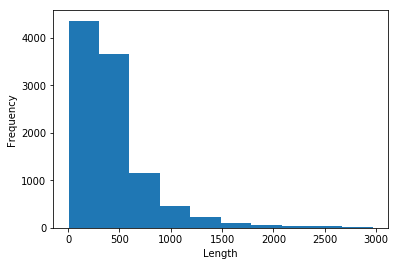

## Histograma de pdb_chain_count menores a 200

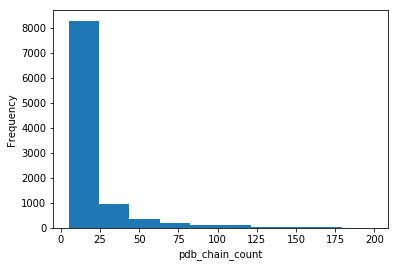

informe generado en 8.95678448677063

In [2]:
import time,datetime
# MAIN/CARGA DE DATOS
printd("# Fercha del informe "+str(datetime.date.today()))
tiempo_inicial = time.time()

log_error = dict()
log_error["SWISPROT"] = list()
log_error["PDBSWS_PDBUNIPROT"] = list()

# paths de archivos iniciales
path_swissprot_tab =  "bases_de_datos_ref/uniprot-reviewed_20190730.tab"
path_pdbwsw_pdbchain = "bases_de_datos_ref/pdb_uniprot_chain_map.lst.2"


#CARGAR SWISSPROT
printd ("## Reading swissprot")

df_sprot = pd.read_csv(path_swissprot_tab,sep="\t")
df_sprot.columns = ['UNIPROT_ID', 
                    'Entry_name', 
                    'Status', 
                    'Protein_names', 
                    'Gene names', 
                    'Organism', 
                    'Length', 'Linage', 
                    'Sequence', 
                    'Taxonomic lineage IDs']
printd("Dataframe size: "+strlen(df_sprot))
display(df_sprot.head(n=5))


#ESTE BLOQUE SIRVE PARA CARGAR SIFTS, 
#actualmente no esta en uso
#
"""
printd ("## Reading sitfs")
df_sifts = pd.read_csv("bases_de_datos_ref/sifts_uniprot_pdb.tsv",header=1,sep="\t")
df_sifts.columns = ["UNIPROT_ID","PDB_list_sifts"]
printd("Dataframe size: "+strlen(df_sifts))
display(df_sifts.head(n=5))

printd ("Merge sprot with sifts")
df_sprot_pdb = pd.merge(df_sprot,df_sifts,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.head(n=1))
"""

###CARGAR PDBSWS
printd ("## Reading PDBSWS")
#Esto carga la lista manualmente por que algunos codigos uniprot no figuran.
#son listas de ancho fijo (ej: '101m A P02185')
#algunas lineas del archivo 
lst_pdbsws = []
tmp_pdbsws = cargar_txt_en_lista(path_pdbwsw_pdbchain)
for index,line in enumerate(tmp_pdbsws):
    if (line[-1] != "?") and (line[-1] != " "):
        pdb_chain_id = line[0:4].upper()+"_"+line[5] 
        tmp = [pdb_chain_id,line[0:4],line[5],line[7:]]
        lst_pdbsws.append(tmp)
    else:
        #Los errores de carga de archivos se anexan a su log
        message = "Error in line "+ str(index) + ": "+ (line) 
        log_error["PDBSWS_PDBUNIPROT"].append(message)
#Borrar vbariables
del pdb_chain_id
del tmp_pdbsws
del tmp
#Crea el dataframe usando la lista
df_pdbsws = pd.DataFrame(lst_pdbsws).dropna()
df_pdbsws.columns = ["PDB_CHAIN_ID","PDB","CHAIN","UNIPROT_ID"]
#Los agrupa por pdb
df_swslist = df_pdbsws.groupby(["UNIPROT_ID"],as_index=False).agg({'PDB_CHAIN_ID':lambda x:list(x)})
#Agrega el numero de pdbs en la lista
df_swslist["pdb_chain_count"] = df_swslist.apply({"PDB_CHAIN_ID":lambda x: len(x)})
df_swslist.columns= ["UNIPROT_ID","PDB_CHAIN_LIST" ,"pdb_chain_count"]
#Informe visible
printd ("swslist dataframe size: "+strlen(df_swslist))
display(df_swslist.head())

### MERGE: AGREGA las columnas de sws a sprot, elimina los uniprot que no tengan mapeo.
printd ("# Merge Sprot with SWS")
df_sprot_pdb = pd.merge(df_sprot,df_swslist,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.describe())

### FILTRANDO
# De las proteinas con mas de 5 cadenas, 
# Separar los virus en una tabla aparte.
df_work = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses")==False)]
df_virus = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses"))]
printd ("# Resumen de informacion del conjunto de proteinas a estudiar")
printd ("Viruses Dataframe size: "+strlen(df_virus) )
printd ("Celular Dataframe size: "+strlen(df_work))
for taxa in ["Bacteria","Archaea","Eukaryota"]:
    printd ("&nbsp;"*6+taxa+" dataframe size: "+strlen (sfilter_linage(df_work,taxa)))

printd("# Graficos del dataframe de trabajo( Organismos Celulares)")

printd("## Histograma de Length menores a 3000")
plot_his1 = df_work["Length"].loc[df_work["Length"]<3000].plot(kind="hist")
plot_his1.set_xlabel("Length")
plt.show()


printd("## Histograma de pdb_chain_count menores a 200")
plot_his2 = df_work["pdb_chain_count"].loc[df_work["pdb_chain_count"]<200].plot(kind="hist")
plot_his2.set_xlabel("pdb_chain_count")
plt.show()

printd( "informe generado en "+str(time.time()-tiempo_inicial))


#Esta linea guarda el df_work en un archivo tsv
df_work.to_csv("archivos_importantes/df_work_"+str(datetime.date.today())+".tsv",sep="\t")

# Definicion de "estudiar_proteina()"

In [6]:
#Checkquer estructura de carpetas
folder_list = ["ent_files","fasta","blast","pdb_chains","cd-hit-results-0.95","cd-hit-results-0.80","tree"]
print ("Checking folder structure.")
for folder in folder_list:
    if not os.path.isdir(folder):
        print ("Creating folder "+ folder)
        os.mkdir(folder)



#Crea un diciconario para acumular los datos a usar
#crea un diccionario que contiene dataframes especificos utiles
#las llaves son los uniprot_id.

def sort_cdhitcluster(list_query):
    return sorted(list_query,key = lambda x: x[2],reverse=True)

def dibujar_histograma(df_query,col):
    plot_his1 = df_query[col].plot(kind="hist")
    plot_his1.set_xlabel(col)
    plt.show()
    return

def show_ensemble_info(query):
    printd("## Mostrando datos de la proteina de estudio")
    for entry in ensemble_data[query]:
        if "sorted" in entry:
            histo = [len(ensemble_data[query][entry][x]) for x in range(30,91,10)]
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(histo)+"`")
        else:
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(ensemble_data[query][entry])+"`")
    return

def run_blast(fasta_file):
    output_filename = fasta_file.replace("fasta/","blast_results/").replace(".fasta","_blast_results.txt")
    cmd = "blastp -query "+ fasta_file +" -db uniprot_sprot.db -evalue 1e-10 -out "+ output_filename +" -outfmt '6 qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcovs' -num_alignments 1000"
    os.system(cmd)
    return output_filename


#el imput es el fasta con los homologos, el coef tiene que ser un string.
def cdhit_stuff(filename_hsf,coef):
    outfile_cdhit =  filename_hsf.replace("fasta/homologs_sprot/","cd-hit-results-"+coef+"/").replace("_homologs_sprot.fasta","_cd-hit")
    
    #si el archivo no existe, corre el cdhit
    if not os.path.isfile(outfile_cdhit):
        cmd = "cd-hit -i " + filename_hsf + " -o " + outfile_cdhit + " -c "+coef
        os.system(cmd)
        
    outfile_cdhit = outfile_cdhit+".clstr"
    #parsea los resultados del cdhit
    clusters = dict()    
    if os.path.isfile(outfile_cdhit):
        with open(outfile_cdhit,"r") as openfile:
            for line in openfile:
                text = line.replace("\n","")
                if text[0] == ">":
                    clus_num = (text[1:])
                    clusters[clus_num] = list()
                if text[0] in [str(x) for x in range(0,10)]:
                    uniprot_id =  (text.split(">")[1][0:6])
                    rep = int ("*" in text.split(">")[1])
                    if rep == False:
                        at_percent = float(text.split("at ")[1].replace("%",""))
                    else:
                        at_percent = float("100.00")
                    clusters[clus_num].append( [uniprot_id,bool(rep),at_percent])
        for cluster_n in clusters:
            clusters[cluster_n] = sort_cdhitcluster(clusters[cluster_n])
        return outfile_cdhit,clusters
    else:
        return "N/A","N/A"

def make_fasta_from_list(query,query_list,outfilename):
    with open(outfilename,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for uniprot_id in query_list:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                    openfile.write(">"+uniprot_id)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
    return outfilename


def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list    

def histo_dic_cdhit(uniprot_id,coef="0.95"):
    bins =  [30,40,50,60,70,80,90]
    histo_dict = dict()
    for n in bins:
        histo_dict[n] = list()

    for id_and_ident in sorted (get_cdhit_rep(uniprot_id,coef),key = lambda x: x[1]):
        for n in bins:
            if (id_and_ident[1] >= n) and (id_and_ident[1]) < n+10:
                histo_dict[n].append(id_and_ident)
                break
    return histo_dict


ensemble_data = dict()
ensemble_df = dict()
#esta es la funcion importante
def estudiar_proteina(query,show=True):
    #Check que el query sea correcto
    if not query in list(df_work["UNIPROT_ID"]):
        print ("La proteina solicitada no se encuentra disponible.")
        return False
    
    #premite la escritura en las variables globales
    global ensemble_data
    global ensemble_df
    
    #carga informacion en ensemble_data y ensemble_df
    ensemble_df[query] = dict()
    ensemble_data[query] = dict(sfilter_by_uniprot(df_work,query).iloc[0])
    #da una lista 
    ensemble_data[query]["PDB_in_df_work"] = (list(set([x[0:4] for x in ensemble_data[query]["PDB_CHAIN_LIST"]])))

    #create fasta file with query seq
    with open ("fasta/"+query+".fasta","w") as openfile:
        openfile.write (">"+query+"\n")
        openfile.write (ensemble_data[query]["Sequence"]+"\n")
    
    #BUSCAR RESULTADOS DEL BLAST, SI NO EXISTEN, CORRERLO
    blast_results_filename = "blast_results/"+query+"_blast_results.txt"
    if os.path.isfile(blast_results_filename):
        if os.path.getsize(blast_results_filename) == 0:
            if show: print ("R ",end="")
            os.system("rm "+blast_results_filename)
            ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
        else:
            ensemble_data[query]["blast_results"] = blast_results_filename
    else:
        ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
    
    
    #PARSEAR LOS RESULTADOS EL BLAST y cargarlos a ensemble data
    if os.path.getsize(ensemble_data[query]["blast_results"]) > 0:
        #leer los datos importantes del blast y colocarlos en un dataframe
        df1 = pd.read_csv(ensemble_data[query]["blast_results"],header=None,sep="\t")
        df1.columns = "qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcov".split(" ")
        df1["UNIPROT_ID"] =  df1["sseqid"].str.split("|",expand=True)[1]
        #se agregan los valores de qstart y qend
        df2 = df1[["UNIPROT_ID","pident","qcov","qstart","qend","sstart","send","gaps"]].loc[(df1["UNIPROT_ID"]!=query) & (df1["pident"]>30) & (df1["qcov"]>75) ]
        
        #esta linea elimina los resultados repetidos en el blast y se queda solo con el primer hit.
        ensemble_df[query]["blast_results"] = df2.drop_duplicates(["UNIPROT_ID"])
        del df1,df2
        #carga la infomacion de los homologos al ensemble_data
        ensemble_data[query]["homologs_sprot"] = list(set(list(ensemble_df[query]["blast_results"]["UNIPROT_ID"])))
        ensemble_data[query]["homologs_in_df_work"] = list(set(df_work["UNIPROT_ID"]) & set(ensemble_data[query]["homologs_sprot"]))
    else:
        ensemble_data[query]["homologs_sprot"] = []
        if show: printd("## Alerta, blast_results still 0 "+query)    

        return False
    
    if len( ensemble_data[query]["homologs_sprot"])< 20:
        return False
    
    #CREAR FASTA DE HOMOLOGOS
    filename_hsf = "fasta/homologs_sprot/"+query+"_homologs_sprot.fasta"
    if os.path.isfile(filename_hsf):
        ensemble_data[query]["homologos_sprot_fasta"] = filename_hsf
    else:
        with open(filename_hsf,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for homolog in ensemble_data[query]["homologs_sprot"]:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog]["Sequence"].iloc[0]
                    openfile.write(">"+homolog)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
            ensemble_data[uniprot_id]["homologos_sprot_fasta"] = filename_hsf
    
    #corre el cdhit si el archivo de salida no existe. 
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.95")
    ensemble_data[query]["cd-hit-results-0.95"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.95_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.95"] = histo_dic_cdhit(query,"0.95")
    
    #Estas lineas hacian el codigo extremadamente lento de decide hacerlo on-demand
    #ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.95")],"fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta")
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.80")
    ensemble_data[query]["cd-hit-results-0.80"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.80_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.80"] = histo_dic_cdhit(query,"0.80")
    
    
    #ensemble_data[query]["cd-hit-results-0.80_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.80")],"fasta/cdhit-0.80/"+query+"_cdhit-0.80.fasta")
    
    #muestra los resutaldos hasta el momento
    if show:
        show_ensemble_info(query)
        printd("### Histograma de los resultados del blast")
    return True

estudiar_proteina("P04637")


Checking folder structure.


## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P04637`

&nbsp;&nbsp;**Entry_name** >`P53_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)`

&nbsp;&nbsp;**Gene names** >`TP53 P53`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`393`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1A1U_A', '1A1U_C', '1AIE_A', '1C26_A', '1DT7_X', '1DT7_Y', '1GZH_A', '1GZH_C', '1H26_E', '1HS5_A', '1HS5_B', '1JSP_A', '1KZY_A', '1KZY_B', '1MA3_B', '1OLG_A', '1OLG_B', '1OLG_C', '1OLG_D', '1OLH_A', '1OLH_B', '1OLH_C', '1OLH_D', '1PES_A', '1PES_B', '1PES_C', '1PES_D', '1PET_A', '1PET_B', '1PET_C', '1PET_D', '1SAE_A', '1SAE_B', '1SAE_C', '1SAE_D', '1SAF_A', '1SAF_B', '1SAF_C', '1SAF_D', '1SAH_A', '1SAH_B', '1SAH_C', '1SAH_D', '1SAJ_A', '1SAJ_B', '1SAJ_C', '1SAJ_D', '1SAK_A', '1SAK_B', '1SAK_C', '1SAK_D', '1SAL_A', '1SAL_B', '1SAL_C', '1SAL_D', '1TSR_A', '1TSR_B', '1TSR_C', '1TUP_A', '1TUP_B', '1TUP_C', '1UOL_A', '1UOL_B', '1YC5_B', '1YCQ_B', '1YCR_B', '1YCS_A', '2AC0_A', '2AC0_B', '2AC0_C', '2AC0_D', '2ADY_A', '2ADY_B', '2AHI_A', '2AHI_B', '2AHI_C', '2AHI_D', '2ATA_A', '2ATA_B', '2ATA_C', '2ATA_D', '2B3G_B', '2BIM_A', '2BIM_B', '2BIN_A', '2BIO_A', '2BIP_A', '2BIQ_A', '2F1X_A', '2F1X_B', '2FEJ_A', '2FOJ_B', '2FOO_B', '2GS0_B', '2H1L_M', '2H1L_N', '2H1L_O', '2H1L_P', '2H1L_Q', '2H1L_R', '2H1L_S', '2H1L_T', '2H1L_U', '2H1L_V', '2H1L_W', '2H1L_X', '2H2D_B', '2H2F_B', '2H4F_D', '2H4H_B', '2H4J_D', '2H59_D', '2H59_E', '2J0Z_A', '2J0Z_B', '2J0Z_C', '2J0Z_D', '2J10_A', '2J10_B', '2J10_C', '2J10_D', '2J11_A', '2J11_B', '2J11_C', '2J11_D', '2J1W_A', '2J1W_B', '2J1X_A', '2J1X_B', '2J1Y_A', '2J1Y_B', '2J1Y_C', '2J1Y_D', '2J1Z_A', '2J1Z_B', '2J20_A', '2J20_B', '2J21_A', '2J21_B', '2K8F_B', '2L14_B', '2LY4_B', '2MEJ_B', '2MWO_B', '2MWP_B', '2MWY_B', '2MZD_B', '2OCJ_A', '2OCJ_B', '2OCJ_C', '2OCJ_D', '2PCX_A', '2QVQ_A', '2QXA_A', '2QXA_B', '2QXA_C', '2QXA_D', '2QXB_A', '2QXB_B', '2QXB_C', '2QXB_D', '2QXC_A', '2QXC_B', '2QXC_C', '2QXC_D', '2RUK_A', '2VUK_B', '2WGX_A', '2WGX_B', '2X0U_A', '2X0U_B', '2X0V_A', '2X0V_B', '2X0W_A', '2X0W_B', '2XWR_B', '2YBG_A', '2YBG_B', '2YBG_C', '2YBG_D', '2YDR_P', '2Z5S_P', '2Z5S_Q', '2Z5T_P', '2Z5T_Q', '2Z5T_R', '3D05_A', '3D06_A', '3D07_A', '3D07_B', '3D08_A', '3D09_A', '3DAC_B', '3IGK_A', '3IGL_A', '3KMD_A', '3KMD_B', '3KMD_C', '3KMD_D', '3KZ8_A', '3KZ8_B', '3LW1_P', '3OQ5_A', '3OQ5_B', '3OQ5_C', '3PDH_D', '3Q01_A', '3Q01_B', '3Q05_A', '3Q05_B', '3Q05_C', '3Q05_D', '3Q06_A', '3Q06_B', '3Q06_C', '3Q06_D', '3SAK_A', '3SAK_B', '3SAK_C', '3SAK_D', '3TG5_B', '3TS8_A', '3TS8_B', '3TS8_C', '3TS8_D', '3ZME_A', '3ZME_B', '4AGL_A', '4AGL_B', '4AGM_A', '4AGM_B', '4AGN_A', '4AGN_B', '4AGO_A', '4AGO_B', '4AGP_A', '4AGP_B', '4AGQ_A', '4AGQ_B', '4BUZ_P', '4BV2_E', '4BV2_H', '4FZ3_B', '4HFZ_B', '4HFZ_D', '4HJE_A', '4HJE_B', '4HJE_C', '4HJE_D', '4IBQ_A', '4IBQ_B', '4IBQ_C', '4IBQ_D', '4IBS_A', '4IBS_B', '4IBS_C', '4IBS_D', '4IBT_A', '4IBT_B', '4IBT_C', '4IBT_D', '4IBU_A', '4IBU_B', '4IBU_C', '4IBU_D', '4IBV_A', '4IBW_A', '4IBY_A', '4IBY_B', '4IBZ_A', '4IBZ_B', '4IBZ_C', '4IBZ_D', '4IJT_A', '4KVP_A', '4KVP_B', '4KVP_C', '4KVP_D', '4LO9_A', '4LO9_B', '4LO9_C', '4LO9_D', '4LOE_A', '4LOE_B', '4LOE_C', '4LOE_D', '4LOF_A', '4MZI_A', '4MZR_A', '4MZR_B', '4MZR_C', '4MZR_D', '4QO1_B', '4RP6_Z', '4RP7_Z', '4X34_C', '4XR8_C', '4XR8_D', '4ZZJ_A', '5A7B_A', '5A7B_B', '5AB9_A', '5AB9_B', '5ABA_A', '5ABA_B', '5AOI_A', '5AOI_B', '5AOJ_A', '5AOJ_B', '5AOK_A', '5AOK_B', '5AOL_A', '5AOL_B', '5AOM_A', '5AOM_B', '5BUA_A', '5ECG_A', '5ECG_B', '5G4M_A', '5G4M_B', '5G4N_A', '5G4N_B', '5G4O_A', '5G4O_B', '5HOU_A', '5HP0_A', '5HPD_A', '5LAP_A', '5LAP_B', '5LGY_A', '5LGY_B', '5LGY_C', '5LGY_D', '5MCT_A', '5MCT_B', '5MCU_A', '5MCU_B', '5MCV_A', '5MCV_B', '5MCW_A', '5MCW_B', '5MF7_A', '5MF7_B', '5MG7_A', '5MG7_B', '5O1A_A', '5O1A_B', '5O1B_A', '5O1B_B', '5O1C_A', '5O1C_B', '5O1D_A', '5O1D_B', '5O1E_A', '5O1E_B', '5O1F_A', '5O1F_B', '5O1G_A', '5O1G_B', '5O1H_A', '5O1H_B', '5O1I_A', '5O1I_B', '5OL0_C', '5OL0_D', '6FF9_A', '6FF9_B', '6FF9_C', '6FF9_D', '6FJ5_A', '6FJ5_B', '6FJ5_C', '6FJ5_D']`

&nbsp;&nbsp;**pdb_chain_count** >`373`

&nbsp;&nbsp;**PDB_in_df_work** >`['2QXC', '5O1B', '4QO1', '2J10', '2VUK', '3D08', '2H4H', '4RP6', '3D05', '1AIE', '3D09', '2ATA', '2BIN', '2MEJ', '1UOL', '1PES', '4LO9', '2B3G', '2MWY', '5O1H', '3KMD', '2AHI', '1GZH', '3D06', '4IBU', '2YBG', '5MCV', '5O1E', '4LOF', '1TUP', '5G4M', '4IBY', '2QVQ', '4IBV', '1H26', '1HS5', '1SAK', '3LW1', '2J20', '5MCW', '5O1F', '1A1U', '6FF9', '3SAK', '1SAH', '2X0V', '2J0Z', '2LY4', '4FZ3', '4KVP', '4BUZ', '5MCT', '4HJE', '2RUK', '2ADY', '5A7B', '2X0W', '3D07', '4MZR', '5O1D', '4MZI', '3TG5', '4X34', '5HP0', '3Q05', '2Z5S', '4HFZ', '1MA3', '4XR8', '5AOK', '2L14', '3Q06', '2BIQ', '4AGP', '5MCU', '5O1A', '5ABA', '2J1X', '5AOI', '5HPD', '4IBZ', '2H59', '4AGN', '5MG7', '1OLG', '2GS0', '5G4O', '1PET', '5LGY', '5LAP', '2MZD', '2H2D', '1YCR', '1YCS', '5G4N', '1SAJ', '3DAC', '3OQ5', '2Z5T', '2J1Z', '1KZY', '3IGK', '4IBQ', '5O1G', '4RP7', '2J21', '2FEJ', '2H4F', '5AOM', '2QXA', '4AGQ', '1YC5', '2BIP', '1SAE', '5AOJ', '5O1C', '2XWR', '2BIO', '2AC0', '2WGX', '2H4J', '4BV2', '4LOE', '2FOJ', '3IGL', '2PCX', '2X0U', '5ECG', '2K8F', '3KZ8', '4IJT', '2F1X', '2QXB', '4AGL', '2YDR', '2BIM', '5O1I', '1SAF', '2J1Y', '5BUA', '2J11', '1DT7', '5OL0', '3Q01', '2J1W', '4IBW', '5AB9', '6FJ5', '3ZME', '1SAL', '1YCQ', '2MWP', '4IBS', '2H2F', '4IBT', '1JSP', '5HOU', '3TS8', '2FOO', '2H1L', '3PDH', '4ZZJ', '2MWO', '1TSR', '4AGM', '5MF7', '2OCJ', '4AGO', '1OLH', '1C26', '5AOL']`

&nbsp;&nbsp;**blast_results** >`blast_results/P04637_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['Q9W678', 'P56424', 'P67939', 'P56423', 'Q9TTA1', 'P10361', 'P41685', 'P67938', 'Q9W679', 'P51664', 'P07193', 'Q95330', 'Q9WUR6', 'Q00366', 'O09185', 'Q29537', 'P79734', 'Q92143', 'Q9JJP2', 'P10360', 'P13481', 'Q9TUB2', 'P61260', 'Q8SPZ3', 'P02340', 'O57538', 'Q64662', 'O36006', 'P25035']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P02340']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/P04637_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67]], 'Cluster 4': [['Q9TTA1', True, 100.0]], 'Cluster 5': [['P10361', True, 100.0]], 'Cluster 6': [['Q95330', True, 100.0]], 'Cluster 7': [['O36006', True, 100.0], ['Q64662', False, 97.45]], 'Cluster 8': [['Q9WUR6', True, 100.0]], 'Cluster 9': [['P02340', True, 100.0]], 'Cluster 10': [['Q8SPZ3', True, 100.0]], 'Cluster 11': [['P41685', True, 100.0]], 'Cluster 12': [['P67939', True, 100.0], ['P67938', False, 100.0]], 'Cluster 13': [['Q9TUB2', True, 100.0]], 'Cluster 14': [['P51664', True, 100.0]], 'Cluster 15': [['Q29537', True, 100.0]], 'Cluster 16': [['P79734', True, 100.0]], 'Cluster 17': [['Q9W678', True, 100.0]], 'Cluster 18': [['P10360', True, 100.0]], 'Cluster 19': [['Q9W679', True, 100.0]], 'Cluster 20': [['P07193', True, 100.0]], 'Cluster 21': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

&nbsp;&nbsp;**cd-hit-sorted-0.95** >`[0, 4, 4, 0, 6, 6, 1]`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93], ['P10361', False, 80.31]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67], ['Q9TTA1', False, 93.13], ['Q8SPZ3', False, 87.08], ['Q95330', False, 86.7], ['O36006', False, 86.45], ['Q64662', False, 86.31], ['Q9TUB2', False, 84.2], ['Q29537', False, 83.73], ['P41685', False, 82.12], ['P67939', False, 81.87], ['P67938', False, 81.87], ['P51664', False, 81.41]], 'Cluster 4': [['Q9WUR6', True, 100.0]], 'Cluster 5': [['P02340', True, 100.0]], 'Cluster 6': [['P79734', True, 100.0]], 'Cluster 7': [['Q9W678', True, 100.0]], 'Cluster 8': [['P10360', True, 100.0]], 'Cluster 9': [['Q9W679', True, 100.0]], 'Cluster 10': [['P07193', True, 100.0]], 'Cluster 11': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

&nbsp;&nbsp;**cd-hit-sorted-0.80** >`[0, 4, 4, 0, 3, 0, 0]`

### Histograma de los resultados del blast

True

# Aplicacion sobre proteinas de ejemplo

In [7]:
# Esta ejecuta la funcion estudiar_protina sobre la lista del df_work
# Solo son aceptadas aquellas que tengan <20 homologos sprot

print ("Run: estudiar_protina over df_work")
list_of_under_20  = []

how_many = len(list(df_work["UNIPROT_ID"]))
for index,uniprot_id in enumerate(list(df_work["UNIPROT_ID"])):
    run_ok =estudiar_proteina(uniprot_id,False)
    
    #Indicador de progreso
    if index % 250 == 0:
        percent = int(index/how_many*100)
        print ("Completed : " + str(percent) +"%" + ".",end="\r")
        
    if run_ok == False:
        list_of_under_20.append(uniprot_id)
        del ensemble_data[uniprot_id]
        #print (uniprot_id + " have been removed under 20 homolog rule")
    else:
        pass
        #print (uniprot_id + " acepted in ensemble_data")

print ("Completed : 100%.")
printd ("**Removed under 20 homolog rule:** `"+str(list_of_under_20[0:10])+"...`")
printd ("**list_of_under_20:** `"+str(len(list_of_under_20))+"`")
 
printd ("**Acepted in enseble data** `"+ str(list(ensemble_data)[0:10])+ "...`")
printd ("**ensemble_data:** `"+str(len(list(ensemble_data)))+"`")

Run: estudiar_protina over df_work
Completed : 100%.


**Removed under 20 homolog rule:** `['P15802', 'P84887', 'P84888', 'P0AAX1', 'P14904', 'O74859', 'P30533', 'Q9UJX3', 'Q12380', 'Q8N0X4']...`

**list_of_under_20:** `5525`

**Acepted in enseble data** `['P04637', 'P07311', 'P20000', 'P39070', 'P0A6I6', 'P01887', 'Q9WZK0', 'P68699', 'P22483', 'P0A6I9']...`

**ensemble_data:** `4640`

In [44]:
#Este fragmento de codigo guarda el contenido de ensemble_data en un archivo csv
timestamp = str(datetime.datetime.now()).replace("-","").replace(":","").replace(" ","")[0:12]
ed_filename = "archivos_importantes/ensemble_data_" + timestamp +".csv"

print ("saving "+ed_filename)
df_new = pd.DataFrame.from_dict(ensemble_data,orient="index")
df_new.head()
df_new.to_csv(ed_filename,header=True,index=False)
del df_new
print ("loading "+ed_filename)
df_reload = pd.read_csv(ed_filename)
print (len(df_reload))
display(df_reload.head())

saving archivos_importantes/ensemble_data_201910291821.csv
loading archivos_importantes/ensemble_data_201910291821.csv
4640


,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,...,blast_results,homologs_sprot,homologs_in_df_work,homologos_sprot_fasta,cd-hit-results-0.95,cd-hit-results-0.95_parsed,cd-hit-sorted-0.95,cd-hit-results-0.80,cd-hit-results-0.80_parsed,cd-hit-sorted-0.80
0,A0QSL8,RPOA_MYCS2,reviewed,DNA-directed RNA polymerase subunit alpha (RNA...,rpoA MSMEG_1524 MSMEI_1488,Mycobacterium smegmatis (strain ATCC 700084 / ...,350,"cellular organisms, Bacteria, Terrabacteria gr...",MLISQRPTLSEETVAENRSRFVIEPLEPGFGYTLGNSLRRTLLSSI...,246196,...,blast_results/A0QSL8_blast_results.txt,"['Q8CX32', 'Q8A4A2', 'B5ZZ57', 'P92429', 'Q81V...","['P0A7Z4', 'Q9Z9H6', 'P9WGZ1', 'P0A7Z6', 'A7ZS...",fasta/homologs_sprot/A0QSL8_homologs_sprot.fasta,cd-hit-results-0.95/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('Q7YJU6', 30.068), ('Q0ZIY7', 30.068), ...",cd-hit-results-0.80/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('A6H5L3', 30.435), ('Q14FC5', 30.508000..."
1,A0R066,ILVE_MYCS2,reviewed,Branched-chain-amino-acid aminotransferase (BC...,ilvE MSMEG_4276 MSMEI_4176,Mycobacterium smegmatis (strain ATCC 700084 / ...,368,"cellular organisms, Bacteria, Terrabacteria gr...",MNSGPLEFTVSANTNPATDAVRESILANPGFGKYYTDHMVSIDYTV...,246196,...,blast_results/A0R066_blast_results.txt,"['O32954', 'P54690', 'A9UZ24', 'K7QKH1', 'P242...","['P0AB80', 'O15382', 'P54687']",fasta/homologs_sprot/A0R066_homologs_sprot.fasta,cd-hit-results-0.95/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ...",cd-hit-results-0.80/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ..."
2,A0R3D3,PTH_MYCS2,reviewed,Peptidyl-tRNA hydrolase (PTH) (EC 3.1.1.29),pth MSMEG_5432 MSMEI_5283,Mycobacterium smegmatis (strain ATCC 700084 / ...,191,"cellular organisms, Bacteria, Terrabacteria gr...",MAEPLLVVGLGNPGPTYAKTRHNLGFMVADVLAGRIGSAFKVHKKS...,246196,...,blast_results/A0R3D3_blast_results.txt,"['A7NBY0', 'A5FRL3', 'A4XR54', 'Q6D557', 'Q0S4...","['P9WHN7', 'Q9HVC3', 'Q9KQ21']",fasta/homologs_sprot/A0R3D3_homologs_sprot.fasta,cd-hit-results-0.95/A0R3D3_cd-hit.clstr,"{'Cluster 0': [['Q8GW64', True, 100.0]], 'Clus...","{30: [('A8G2Q9', 30.412), ('Q5XEM3', 30.857), ...",cd-hit-results-0.80/A0R3D3_cd-hit.clstr,"{'Cluster 0': [['Q8GW64', True, 100.0]], 'Clus...","{30: [('Q5XEM3', 30.857), ('A6L8V3', 31.522), ..."
3,A0R4Q6,CP142_MYCS2,reviewed,Steroid C26-monooxygenase (EC 1.14.15.28) (Cho...,cyp142 cyp142A2 MSMEG_5918,Mycobacterium smegmatis (strain ATCC 700084 / ...,401,"cellular organisms, Bacteria, Terrabacteria gr...",MTQMLTRPDVDLVNGMFYADGGAREAYRWMRANEPVFRDRNGLAAA...,246196,...,blast_results/A0R4Q6_blast_results.txt,"['O31785', 'P63714', 'Q12599', 'P9WPP2', 'Q9ZH...","['P9WPN8', 'P23295', 'P00183', 'Q59523', 'P486...",fasta/homologs_sprot/A0R4Q6_homologs_sprot.fasta,cd-hit-results-0.95/A0R4Q6_cd-hit.clstr,"{'Cluster 0': [['P9WPN7', True, 100.0], ['P637...","{30: [('P00183', 30.108), ('Q9L9F9', 30.166), ...",cd-hit-results-0.80/A0R4Q6_cd-hit.clstr,"{'Cluster 0': [['P9WPN7', True, 100.0], ['P637...","{30: [('P00183', 30.108), ('Q9L9F9', 30.166), ..."
4,A0R6E0,TRES_MYCS2,reviewed,Trehalose synthase/amylase TreS (EC 3.2.1.1) (...,treS MSMEG_6515 MSMEI_6343,Mycobacterium smegmatis (strain ATCC 700084 / ...,593,"cellular organisms, Bacteria, Terrabacteria gr...",MEEHTQGSHVEAGIVEHPNAEDFGHARTLPTDTNWFKHAVFYEVLV...,246196,...,blast_results/A0R6E0_blast_results.txt,"['Q59905', 'O16099', 'Q99040', 'P9WQ18', 'P071...",['O06994'],fasta/homologs_sprot/A0R6E0_homologs_sprot.fasta,cd-hit-results-0.95/A0R6E0_cd-hit.clstr,"{'Cluster 0': [['O06458', True, 100.0]], 'Clus...","{30: [('Q02751', 30.037), ('O05242', 30.189), ...",cd-hit-results-0.80/A0R6E0_cd-hit.clstr,"{'Cluster 0': [['O06458', True, 100.0]], 'Clus...","{30: [('Q02751', 30.037), ('O05242', 30.189), ..."


# Resumen de los resultados ya calculados


In [8]:
import math

#Get the total size of a folder.
def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

#convierte un valor entero en bytes a human 
def bytes2human(size):
    unit = ["","k","M","G","T","P","E","Z"]
    if size > 0:
        order = int(math.log(size,1024))
        if order > (len(unit)-1):
            order = (len(unit)-1)
        size_h = str(int(size/(1024**order)))+"\t"+unit[order]+"b"
    else:
        size_h = "0\t b"
    return size_h


folder_list = ["archivos_importantes",
               "bases_de_datos_ref",
               "fasta",
               "blast_results",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree",
               "ent_files",
               "pdb_chains"]

print ("Timestamp: ",str(datetime.datetime.now()))
print ("")

for folder in folder_list:
    if os.path.isdir(folder):
        size =  bytes2human(get_size(folder))
        print (size,folder,sep="\t")
    else:
        print (folder +" is not a folder")    

print ("")
print ("You should backup al this data")

Timestamp:  2019-10-17 19:16:19.935800

97	Mb	archivos_importantes
663	Mb	bases_de_datos_ref
350	Mb	fasta
209	Mb	blast_results
225	Mb	cd-hit-results-0.95
165	Mb	cd-hit-results-0.80
42	Mb	tree
206	Mb	ent_files
187	Mb	pdb_chains

You should backup al this data


# Experimental code, and random filters to data

Este sector esta para experimentar codigos previos a su implementacion y analizar datos en tiempo real.

In [191]:
#histodict_tuple: diccionario de cohortes, con lista de tuplas ordenadas by [1] (Uniprot_id,%ident)
#homologos_dfwork: una lista con los 
def seleccionar_para_alinear(histodic_tuple,homologos_dfwork,cutoff=25):
    para_alinear = dict()
    for x in range(30,91,10):
        cantidad = len(histodic_tuple[x])
        #basicamente, como cada cohorte esta ordenada por porcentaje de identidad
        # cuando hay muchos trata de cubrir todo el intervalo
        # saltando de a "k" en la iteracion.
        if cantidad > cutoff:
            seleccionados_i = []
            k = cantidad//cutoff 
            if k==0:
                k=1 #el minimo es i
            for i in range(0,cantidad,k):
                seleccionados_i.append (histodic_tuple[x][i][0])

                #para no pasarse, corta si se supera el cutoff
                if len(seleccionados_i) >= cutoff:
                    break
        else:
            #si son menos, los mandamos todos por las dudas
            seleccionados_i =  [x[0] for x in histodic_tuple[x]]

        para_alinear[x] = seleccionados_i

    histo_selec = [len(para_alinear[x]) for x in range (30,91,10)]

    #aca hay que agregar, si no estan los homologos que estan en df_work
    # si bien algunos sean descartados por los filtros, es necesario que esten
    # en los alineamientos para compararlos

    seleccionados_full = []
    for x in range (30,91,10):
        for homolgos in para_alinear[x]:
            seleccionados_full.append(homolgos)
    for ids in homologos_dfwork:
        if not ids in seleccionados_full:
            seleccionados_full.append(ids)
    
    return seleccionados_full,histo_selec


#### FIN DEL AREA DE DEFINICON DE FUNCIONES




#para ser incluidos, deben tener + de 80 al final
count = 0
list_to_ali = []
for uniprot_id in list(ensemble_data):
    #arma un historgrama de los cluster de ch-hit
    histo = [len(ensemble_data[uniprot_id]["cd-hit-sorted-0.95"][x]) for x in range(30,91,10)]
    
    
    if (sum (histo) > 80 ) and (histo.count(0)<=3):
        cdhit95_histodic = ensemble_data[uniprot_id]["cd-hit-sorted-0.95"]
        homologos_dfwork = ensemble_data[uniprot_id]["homologs_in_df_work"]
        pdb_chains = str(ensemble_data[uniprot_id]["pdb_chain_count"])
        
        
        
        #Aca se usa la funcion para seleccionar las secuencias que van al alineamiento
        seleccionados_full,histo_selec =  seleccionar_para_alinear(cdhit95_histodic,homologos_dfwork,25)
        if len(seleccionados_full) > 70:
            # print (uniprot_id,"cdhit",histo,sum(histo),"-","-","-",sep="\t")
            print (uniprot_id,pdb_chains,len(seleccionados_full),histo_selec,sep="\t") 
            ensemble_data[uniprot_id]["seleccionados_full"]= seleccionados_full
            count +=1
            list_to_ali.append(uniprot_id)

print ("total: ",count)




P20000	8	102	[25, 25, 11, 19, 2, 0, 3]
P39070	26	83	[0, 13, 25, 22, 10, 8, 2]
P0A6I6	49	116	[25, 25, 25, 25, 7, 2, 1]
Q9WZK0	6	85	[25, 25, 25, 1, 0, 1, 0]
P0A6I9	11	75	[25, 25, 20, 4, 0, 1, 0]
P17202	16	74	[25, 25, 0, 0, 5, 3, 0]
Q9I6D1	6	115	[25, 25, 25, 25, 3, 1, 3]
Q9HTJ1	38	112	[25, 25, 17, 5, 16, 7, 0]
O26010	7	72	[25, 25, 11, 2, 0, 0, 1]
B7V2S6	6	115	[25, 25, 25, 25, 3, 1, 3]
Q75I93	42	74	[25, 25, 12, 4, 1, 0, 0]
P16474	5	93	[0, 25, 25, 25, 6, 1, 1]
G3I8R9	6	96	[0, 25, 25, 25, 7, 2, 2]
P07463	10	128	[25, 25, 20, 9, 5, 19, 1]
P24941	485	138	[25, 25, 25, 25, 2, 2, 1]
P00772	118	94	[25, 4, 13, 1, 0, 7, 0]
P9WPE5	23	103	[24, 25, 25, 8, 14, 2, 1]
P60712	5	143	[25, 25, 10, 11, 10, 25, 25]
P84080	8	93	[25, 25, 9, 7, 3, 10, 7]
P63820	12	92	[25, 25, 25, 5, 3, 1, 0]
B5XYG3	18	74	[1, 24, 25, 12, 2, 5, 3]
P9WPA5	25	93	[25, 25, 25, 4, 2, 4, 2]
Q94FV7	6	72	[4, 0, 24, 25, 18, 0, 0]
Q7XKV4	6	87	[25, 25, 25, 2, 1, 2, 0]
P11021	33	97	[0, 25, 25, 25, 6, 3, 2]
P0DP25	169	129	[25, 25, 22, 7, 4, 15, 8

Q9RY65	29	87	[0, 15, 25, 25, 16, 2, 0]
Q8D8W6	8	91	[25, 25, 25, 8, 2, 5, 0]
P0A7M2	90	129	[6, 25, 25, 22, 25, 22, 4]
P04257	5	101	[3, 11, 25, 25, 25, 7, 0]
Q2FW14	7	81	[0, 25, 25, 19, 10, 2, 0]
P60422	106	130	[2, 25, 25, 25, 25, 20, 3]
P0A7R1	104	135	[25, 25, 25, 20, 25, 8, 3]
P02417	7	100	[25, 25, 25, 11, 8, 2, 0]
P04179	66	85	[17, 25, 25, 4, 1, 1, 4]
P63316	46	87	[25, 25, 14, 4, 0, 0, 0]
P00950	23	94	[20, 25, 25, 21, 1, 0, 0]
P62399	105	127	[19, 25, 25, 25, 19, 7, 2]
Q2FW21	7	88	[10, 25, 25, 20, 1, 2, 1]
P32905	9	84	[4, 3, 25, 24, 16, 9, 2]
P11802	10	81	[25, 25, 0, 1, 1, 0, 1]
P00396	78	121	[16, 25, 18, 24, 16, 12, 10]
P00767	9	101	[25, 25, 1, 2, 1, 4, 0]
P40616	8	87	[25, 25, 25, 3, 2, 0, 0]
P0A6H0	38	132	[8, 25, 25, 25, 25, 6, 1]
P62898	12	110	[15, 16, 17, 25, 8, 17, 9]
P0A6K1	5	118	[25, 25, 25, 15, 17, 8, 2]
P27248	11	104	[25, 25, 25, 13, 11, 3, 2]
P00766	148	102	[25, 25, 1, 2, 3, 2, 0]
P99999	22	112	[14, 22, 17, 25, 11, 19, 2]
P00163	11	78	[0, 23, 25, 18, 5, 6, 0]
P00352	17	100	[2

In [192]:
ensemble_data["P20000"]["seleccionados_full"]


['Q54I10',
 'A7GPH3',
 'B6EML5',
 'Q9I6C8',
 'Q5WH11',
 'S0ENH1',
 'P94358',
 'A8FDV4',
 'Q3C1A6',
 'P94391',
 'Q6L285',
 'O05619',
 'Q63B74',
 'Q5KYR4',
 'A5TYV9',
 'A8F9T1',
 'Q5KYK0',
 'P0A391',
 'E1V7V8',
 'H2IFE7',
 'Q9UTM8',
 'P94428',
 'A8GHZ8',
 'Q0T431',
 'Q97UA1',
 'Q5HJK3',
 'Q66I21',
 'P80668',
 'Q87H52',
 'A7N2Q0',
 'P46369',
 'B7GYG4',
 'Q9ZA11',
 'Q9JLJ3',
 'A5VPA5',
 'O04895',
 'P0C6D7',
 'P42757',
 'P37685',
 'Q13NG6',
 'Q6F9F7',
 'P23883',
 'Q8PPG7',
 'B1J2K9',
 'A4XPI6',
 'Q2KB42',
 'Q3K5H4',
 'Q9L4K1',
 'P46368',
 'P71016',
 'Q25417',
 'O74187',
 'Q56YU0',
 'O14293',
 'O34660',
 'P41751',
 'P42041',
 'P30842',
 'P30841',
 'P40108',
 'P08157',
 'P32872',
 'Q8S528',
 'Q9SU63',
 'Q27640',
 'Q29490',
 'P47895',
 'P13601',
 'Q9JHW9',
 'P15437',
 'O93344',
 'O35945',
 'P51977',
 'P24549',
 'Q8HYE4',
 'Q62148',
 'P86886',
 'P27463',
 'P52476',
 'Q8MI17',
 'P30837',
 'Q9CZS1',
 'P47738',
 'P12762',
 'Q2XQV4',
 'Q59931',
 'P77674',
 'P09546',
 'P30838',
 'P17202',
 'P51649',

In [ ]:
# para hacer el archivo fasta 
def make_fasta_from_list(query,query_list,outfilepath):
    #Chequer que el representante este antes de agregarlo
    if not query in query_list:
        query_list = [query]+list(set(query_list))
    with open(outfilepath,"w") as openfile:
        for uniprot_id in query_list:
            #Si la secuencia esta en el dataframe de sprot
            if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                openfile.write(">"+uniprot_id)
                openfile.write("\n")
                openfile.write(seq)
                openfile.write("\n")
def fasta2phy(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    os.system(clustal_cmd)
    return


#ingresa fasta, sale philp
def alig_fasta(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -align -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    #print (clustal_cmd)
    os.system(clustal_cmd)
    return

def hacer_arbol(uniprot_id,phy_file,code=""):
    os.chdir(path+"/tree")
    os.system( 'echo "XXXXX\nY" > config'.replace("XXXXX","../"+phy_file) )
    os.system( 'phylip protdist < config') 
    os.system( 'mv outfile XXXXX_protdist_WWWWW'.replace("XXXXX",uniprot_id).replace("WWWWW",code) )
    os.system( 'echo "XXXXX_protdist_WWWWW\nJ\n99\nY" >config'.replace("XXXXX",uniprot_id).replace("WWWWW",code) ) 
    os.system( 'phylip neighbor <config')
    os.system("rm config")
    os.system("mv outfile "+uniprot_id+"_"+code+".outfile")
    os.system("mv outtree "+uniprot_id+"_"+code+".tree")
    os.chdir(path)
    return

path = "/home/emanuel/Documents/trabajo_actual/MegaScript/"
caped25 = list_to_ali
for index,uniprot_id in enumerate(caped25):
    fasta_file = "fasta/caped25"+uniprot_id+"_caped25.fasta"
    ali_phy = "alignments/"+uniprot_id+"_caped25.phy"
    out_tree = uniprot_id+"caped25.tree"
    
    
    print (uniprot_id,index,"of",len(list_to_ali),"1) FASTA",end="\r")
    
    if not os.path.isfile(fasta_file):
        make_fasta_from_list(uniprot_id, 
                         ensemble_data[uniprot_id]["seleccionados_full"],
                         path+fasta_file)
    
    
    print (uniprot_id,index,"of",len(list_to_ali),"2) ALING",end="\r")
    if not os.path.isfile(ali_phy):
        alig_fasta(fasta_file,ali_phy)
        
    
    print (uniprot_id,index,"of",len(list_to_ali),"3) TREE ",end="\r")
    if not os.path.isfile("tree/"+out_tree):
        hacer_arbol(uniprot_id,ali_phy,"caped25")
                          
    ensemble_data[uniprot_id]["caped25"] = [fasta_file,ali_phy,out_tree]
    

In [ ]:
from Bio import SeqIO
#hay que darle un fasta alineado, y el nombre de la referencia en el fasta.
#la secuencia de referencia quedara arriba de todo
def choper(fasta_filepath, ref,outfile):
    ali_homolog = {}
    for record in SeqIO.parse(fasta_filepath,"fasta"):
        ali_homolog[record.id] = list(record.seq) #se guarda como lista para poder borrar elementos
    ref_seq = ali_homolog[ref]
    
    #Genera una lista donde se guardan los index que deberian ser borrados
    index_for_removal = []
    for index,aa in enumerate(ref_seq):
        if aa == "-":
            index_for_removal.append(index)
    
    # Como la lista esta en orden creciente, se invierte para ir borrando de atras para adelante
    # y no cambiar el largo de las listas durante la iteracion
    index_for_removal.sort(reverse=True)

    for i in index_for_removal:
        for ids in ali_homolog:
            del ali_homolog[ids][i]
       
    #Esto es para asegurarse que la referencia quede arriba de todo
    ali_choped = {}
    ali_choped[ref] = ali_homolog[ref]
    del ali_homolog[ref]
    ali_choped.update(ali_homolog)
    
    #Esto guarda el archivo con las secuencias chopeadas
    with open(outfile,"w") as savefile:
        for ids in ali_choped:
            seq = ""
            for aa in ali_choped[ids]:
                seq += aa
                ali_choped[ids]=seq
            savefile.write(">"+ids+"\n"+ali_choped[ids]+"\n")
    return ali_chope

## Old stuff

In [ ]:
path = "/home/emanuel/Documents/trabajo_actual/MegaScript/"
# Convertir un archivo fasta en phy


for index,uniprot_id in enumerate(list_to_ali)):
    fasta_file = "fasta/caped25"+uniprot_id+"_caped25.fasta"
    ali_phy = "alignments/"+uniprot_id+"_caped25.phy"
    out_tree = uniprot_id+"caped25.tree"
    print (index,"of",len(bloque1)*100,"% | Alineando: ",uniprot_id,end="\r")
    if not os.path.isfile(ali_phy):
        alig_fasta(fasta_file,ali_phy)
    print (index+1/len(bloque1)*100,"% | Making Tree: ",uniprot_id,end="\r")
    hacer_arbol(uniprot_id,ali_phy,"caped25")

In [ ]:
count = 0
print ("ID","sprot","dfwork","confs_data","clusters""[30,40,50,60,70,80,90]",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data = ensemble_data[uniprot_id]["pdb_chain_count"]
        gene_name = ensemble_data[uniprot_id]["Gene names"]
        clusters = len(ensemble_data[uniprot_id]["cd-hit-results_parsed"])      
        homologos_for_tree = list()
        for cluster in ensemble_data[uniprot_id]["cd-hit-results_parsed"]:
            for element in ensemble_data[uniprot_id]["cd-hit-results_parsed"][cluster]:
                if element[1]:
                    homologos_for_tree.append(element[0])
        print (uniprot_id,homologs_sprot,homologs_dfwork,confs_data,len(homologos_for_tree),"\t",sep="\t")
        for items in homologos_for_tree:
            print("\t",items)
            df1 = ensemble_df[uniprot_id]["blast_results"]
            
            
            
    

In [6]:
def make_histogram(ident_list):
    ident_histo = []
    for n in range(3,10):
        ident_histo.append (len([x for x in ident_list if (x >= n*10) and (x < (n+1)*10) ]))
    return ident_histo

def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list





count_total = 0
count_cond  = 0
count_nocond =0

bloque1 = []
print ("UNIPROT","","count","histogram",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        
        #df1 lo crea para que sea mas facil filtrar
        df1 = ensemble_df[uniprot_id].get("blast_results")
        #elimino los que tienen 100 de identidad
        homologs_sprot = int(len(set(df1.loc[df1["pident"]<100].get("UNIPROT_ID"))))
        
        count_total += 1
        
        if (homologs_sprot > 100 ) & (homologs_sprot < 200 ):
            clusters_95 = str(len( ensemble_data[uniprot_id]["cd-hit-results-0.95_parsed"]))
            clusters_80 = str(len( ensemble_data[uniprot_id]["cd-hit-results-0.80_parsed"]))
        
        
                #Es necesario que tenga mas de 200homologos en sprot
        
            ident_list = list(df1["pident"])
                        
            #check si no hay hits repetidos en blast
            
            ident_histo =  make_histogram(ident_list)
            histo_95 = make_histogram([x[1] for x in get_cdhit_rep(uniprot_id,"0.95")])
            #histo_80 = make_histogram([x[1] for x in get_cdhit_rep(uniprot_id,"0.80")])

            #histo count menor a 2 deberia permitir un bin vacio
            if ident_histo.count(0)<2:
                print (uniprot_id," sprot ",homologs_sprot,ident_histo,sep="\t")
                print (""," at 95 ",clusters_95,histo_95,sep="\t")
                #print (""," at 80 ",clusters_80,histo_80,sep="\t")
                print ("")
                bloque1.append(uniprot_id)
                count_cond+=1
            else:
                count_nocond +=1
print ("")
print (count_cond, "cumplen con la condicion establecida maximo un bin")
print (count_nocond, "NO cumplen con la condicion establecida.")
print (count_total, "es el total de proteinas actual en ensemble_data")

UNIPROT		count	histogram
P68699	 sprot 	108	[1, 29, 58, 0, 4, 8, 8]
	 at 95 	31	[1, 7, 10, 0, 4, 6, 3]

Q6DE08	 sprot 	107	[90, 3, 2, 9, 1, 0, 2]
	 at 95 	86	[69, 3, 2, 9, 1, 0, 1]

Q94F62	 sprot 	135	[108, 10, 9, 1, 6, 1, 0]
	 at 95 	133	[106, 10, 9, 1, 5, 1, 0]

P39779	 sprot 	110	[0, 15, 38, 21, 10, 23, 3]
	 at 95 	38	[0, 4, 14, 7, 5, 6, 1]

P84080	 sprot 	197	[64, 52, 14, 15, 6, 28, 18]
	 at 95 	101	[36, 29, 9, 7, 3, 10, 7]

Q07717	 sprot 	106	[33, 4, 7, 9, 47, 6, 0]
	 at 95 	62	[26, 4, 7, 8, 13, 3, 0]

Q7XKV4	 sprot 	185	[78, 58, 43, 2, 1, 2, 1]
	 at 95 	147	[43, 58, 40, 2, 1, 2, 0]

P55064	 sprot 	181	[125, 33, 14, 5, 0, 1, 3]
	 at 95 	144	[106, 23, 8, 3, 0, 1, 2]

P01888	 sprot 	101	[29, 5, 5, 8, 52, 1, 1]
	 at 95 	56	[21, 5, 5, 8, 14, 1, 1]

P12995	 sprot 	134	[115, 1, 12, 3, 1, 2, 0]
	 at 95 	82	[66, 1, 10, 1, 1, 2, 0]

P00415	 sprot 	155	[0, 22, 15, 24, 13, 33, 48]
	 at 95 	92	[0, 21, 14, 18, 9, 21, 8]

P40394	 sprot 	124	[12, 51, 22, 29, 8, 2, 0]
	 at 95 	94	[9, 33, 21, 22, 

P05088	 sprot 	102	[20, 51, 24, 4, 1, 2, 0]
	 at 95 	81	[20, 36, 17, 3, 1, 2, 0]

P62136	 sprot 	176	[12, 94, 10, 6, 18, 23, 13]
	 at 95 	111	[9, 63, 2, 5, 18, 10, 3]

P23478	 sprot 	132	[91, 23, 15, 1, 1, 1, 0]
	 at 95 	74	[45, 21, 4, 1, 1, 1, 0]

P84228	 sprot 	158	[0, 1, 6, 5, 4, 40, 102]
	 at 95 	48	[0, 1, 6, 5, 3, 18, 14]

P84243	 sprot 	161	[0, 1, 6, 4, 5, 22, 123]
	 at 95 	50	[0, 1, 6, 4, 5, 16, 17]

P0A1R0	 sprot 	133	[0, 4, 1, 19, 34, 38, 37]
	 at 95 	52	[0, 4, 1, 6, 20, 16, 4]

P83519	 sprot 	199	[164, 11, 11, 3, 1, 1, 8]
	 at 95 	158	[133, 6, 9, 2, 1, 1, 5]

P01635	 sprot 	153	[9, 59, 57, 22, 5, 1, 0]
	 at 95 	111	[3, 31, 35, 8, 2, 1, 0]

Q29963	 sprot 	148	[20, 3, 1, 15, 13, 77, 19]
	 at 95 	72	[12, 3, 1, 12, 10, 27, 6]

P61981	 sprot 	139	[0, 1, 21, 67, 39, 4, 7]
	 at 95 	88	[0, 1, 18, 51, 15, 1, 2]

P08185	 sprot 	126	[49, 67, 2, 6, 0, 1, 1]
	 at 95 	109	[44, 56, 2, 5, 0, 1, 0]

P07711	 sprot 	151	[76, 49, 16, 2, 6, 1, 1]
	 at 95 	134	[69, 45, 11, 2, 5, 1, 0]

Q8DP79	 spr

Q04917	 sprot 	142	[0, 2, 29, 59, 38, 11, 3]
	 at 95 	88	[0, 2, 26, 43, 14, 2, 0]

P30685	 sprot 	146	[20, 1, 1, 15, 15, 56, 38]
	 at 95 	72	[13, 1, 1, 12, 11, 27, 6]

P84142	 sprot 	192	[23, 118, 45, 3, 0, 1, 2]
	 at 95 	159	[21, 94, 38, 3, 0, 1, 1]

Q5EEL8	 sprot 	191	[3, 16, 127, 23, 18, 0, 4]
	 at 95 	86	[3, 9, 47, 15, 11, 0, 0]

P0A8G6	 sprot 	136	[3, 11, 55, 27, 7, 12, 21]
	 at 95 	90	[3, 11, 43, 19, 7, 4, 3]

P0AF12	 sprot 	163	[8, 25, 80, 9, 17, 2, 22]
	 at 95 	80	[5, 14, 42, 4, 8, 2, 4]

P0A731	 sprot 	186	[0, 66, 51, 26, 17, 3, 23]
	 at 95 	94	[0, 37, 28, 16, 8, 3, 1]

P02699	 sprot 	158	[9, 43, 4, 7, 54, 21, 20]
	 at 95 	110	[9, 32, 4, 7, 34, 17, 6]

Q16695	 sprot 	173	[0, 2, 4, 5, 12, 58, 92]
	 at 95 	48	[0, 2, 4, 5, 9, 20, 7]

P02299	 sprot 	158	[0, 1, 6, 5, 4, 40, 102]
	 at 95 	48	[0, 1, 6, 5, 3, 18, 14]

P02185	 sprot 	125	[5, 19, 0, 9, 11, 64, 17]
	 at 95 	61	[5, 10, 0, 6, 7, 30, 2]

P01012	 sprot 	102	[91, 6, 1, 0, 1, 2, 1]
	 at 95 	92	[81, 6, 1, 0, 1, 1, 1]

P20142	 s

P68082	 sprot 	125	[2, 23, 0, 4, 11, 72, 13]
	 at 95 	62	[2, 14, 0, 3, 7, 29, 6]

P63244	 sprot 	147	[120, 3, 5, 11, 4, 2, 2]
	 at 95 	100	[79, 1, 4, 8, 4, 2, 1]

P62825	 sprot 	139	[95, 2, 0, 4, 15, 14, 9]
	 at 95 	81	[57, 2, 0, 4, 7, 7, 3]

P0C0W1	 sprot 	104	[12, 45, 19, 2, 14, 5, 7]
	 at 95 	71	[11, 34, 16, 2, 4, 3, 0]

P32905	 sprot 	145	[4, 3, 70, 31, 20, 12, 5]
	 at 95 	100	[4, 3, 41, 24, 16, 9, 2]

Q9XIC7	 sprot 	132	[105, 11, 9, 1, 2, 3, 1]
	 at 95 	131	[104, 11, 9, 1, 2, 2, 1]

P12081	 sprot 	112	[94, 3, 6, 0, 5, 1, 3]
	 at 95 	78	[62, 3, 6, 0, 4, 1, 1]

Q9Y689	 sprot 	184	[67, 99, 10, 2, 3, 0, 3]
	 at 95 	89	[38, 38, 8, 2, 2, 0, 0]

P62898	 sprot 	182	[17, 16, 17, 58, 8, 26, 40]
	 at 95 	130	[15, 16, 17, 47, 8, 17, 9]

P99999	 sprot 	180	[17, 22, 18, 52, 14, 39, 18]
	 at 95 	129	[14, 22, 17, 43, 11, 19, 2]

Q93X62	 sprot 	145	[104, 33, 1, 1, 1, 2, 3]
	 at 95 	123	[89, 26, 1, 1, 1, 2, 1]

P00847	 sprot 	191	[114, 14, 23, 3, 18, 15, 4]
	 at 95 	144	[83, 8, 20, 2, 16, 12, 2]

P

P0A9M7	 sprot 	108	[0, 20, 14, 14, 12, 14, 34]
	 at 95 	54	[0, 16, 10, 9, 8, 6, 4]

P28015	 sprot 	104	[1, 16, 18, 21, 17, 14, 17]
	 at 95 	51	[1, 9, 14, 13, 3, 8, 2]


404 cumplen con la condicion establecida maximo un bin
349 NO cumplen con la condicion establecida.
4640 es el total de proteinas actual en ensemble_data


In [187]:
ensemble_data["P9WPC3"]

{'UNIPROT_ID': 'P9WPC3',
 'Entry_name': 'CLPP2_MYCTU',
 'Status': 'reviewed',
 'Protein_names': 'ATP-dependent Clp protease proteolytic subunit 2 (EC 3.4.21.92) (Endopeptidase Clp 2)',
 'Gene names': 'clpP2 Rv2460c MTV008.16c',
 'Organism': 'Mycobacterium tuberculosis (strain ATCC 25618 / H37Rv)',
 'Length': 214,
 'Linage': 'cellular organisms, Bacteria, Terrabacteria group, Actinobacteria, Actinobacteria (high G+C Gram-positive bacteria), Corynebacteriales, Mycobacteriaceae, Mycobacterium, Mycobacterium tuberculosis complex, Mycobacterium tuberculosis, Mycobacterium tuberculosis (strain ATCC 25618 / H37Rv)',
 'Sequence': 'MNSQNSQIQPQARYILPSFIEHSSFGVKESNPYNKLFEERIIFLGVQVDDASANDIMAQLLVLESLDPDRDITMYINSPGGGFTSLMAIYDTMQYVRADIQTVCLGQAASAAAVLLAAGTPGKRMALPNARVLIHQPSLSGVIQGQFSDLEIQAAEIERMRTLMETTLARHTGKDAGVIRKDTDRDKILTAEEAKDYGIIDTVLEYRKLSAQTA',
 'Taxonomic lineage IDs': 83332,
 'PDB_CHAIN_LIST': ['4U0G_A',
  '4U0G_B',
  '4U0G_C',
  '4U0G_D',
  '4U0G_E',
  '4U0G_F',
  '4U0G_G',
  '4U0G_O',
  '4U

In [35]:
def make_fasta_from_list(query,query_list,outfilename):
    #Chequer que el representante este antes de agregarlo
    if not query in query_list:
        query_list = [query]+list(set(query_list))
    with open(outfilename,"w") as openfile:
        for uniprot_id in query_list:
            #Si la secuencia esta en el dataframe de sprot
            if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                openfile.write(">"+uniprot_id)
                openfile.write("\n")
                openfile.write(seq)
                openfile.write("\n")
    return

print ("Making Fastas chhit 0.95")
for index,query in enumerate(bloque1):
    print (index,"of",len(bloque1),query,end="\r")
    rep_list95 = [x[0] for x in get_cdhit_rep(query,"0.95")]
    fastafilename = "fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta"
    ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,rep_list95,fastafilename)

Making Fastas chhit 0.95


In [7]:
path = "/home/emanuel/Documents/trabajo_actual/MegaScript/"
# Convertir un archivo fasta en phy
def fasta2phy(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    os.system(clustal_cmd)
    return

def alig_fasta(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -align -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    #print (clustal_cmd)
    os.system(clustal_cmd)
    return

def hacer_arbol(uniprot_id,phy_file,code=""):
    os.chdir(path+"/tree")
    os.system( 'echo "XXXXX\nY" > config'.replace("XXXXX","../"+phy_file) )
    os.system( 'phylip protdist < config') 
    os.system( 'mv outfile XXXXX_protdist'.replace("XXXXX",uniprot_id) )
    os.system( 'echo "XXXXX_protdist\nJ\n99\nY" >config'.replace("XXXXX",uniprot_id) ) 
    os.system( 'phylip neighbor <config')
    os.system("rm config")
    os.system("mv outfile "+uniprot_id+"_"+code+".outfile")
    os.system("mv outtree "+uniprot_id+"_"+code+".tree")
    os.chdir(path)
    return

for index,uniprot_id in enumerate(bloque1):
    fasta_file = "fasta/cdhit-0.95/"+uniprot_id+"_cdhit-0.95.fasta"
    ali_phy = "alignments/"+uniprot_id+"_cdhit95.phy"
    out_tree = uniprot_id+"cd_hit95.tree"
    print (index+1/len(bloque1)*100,"% | Alineando: ",uniprot_id,end="\r")
    if not os.path.isfile(ali_phy):
        alig_fasta(fasta_file,ali_phy)
    print (index+1/len(bloque1)*100,"% | Making Tree: ",uniprot_id,end="\r")
    hacer_arbol(uniprot_id,ali_phy,"cdhit95")

In [20]:
for uniprot_id in bloque1:
    ali_phy = "alignments/"+uniprot_id+"_cdhit95.phy"
    out_tree = "tree/"+uniprot_id+"_cdhit95.tree"
    if not  os.path.isfile(ali_phy):
        print (uniprot_id," ali_phy ERROR")
    if not os.path.isfile(out_tree):
        print (uniprot_id," outtree ERROR")
        

P09622  outtree ERROR
0
Q06830  outtree ERROR
0
P32119  outtree ERROR
0
Q63716  outtree ERROR
0
Q9UH77  outtree ERROR
0
P34760  outtree ERROR
0


# Trabajando con el dataframe de virus

In [39]:
df_virus.loc[ (df_virus["Organism"].str.contains("immunodeficiency")) ]

#df_virus.loc[ (df_virus["pdb_chain_count"] > 100) ]

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,PDB_CHAIN_LIST,pdb_chain_count
3018,P04608,TAT_HV1H2,reviewed,Protein Tat (Transactivating regulatory protein),tat,Human immunodeficiency virus type 1 group M su...,86,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,11706,"[3MI9_C, 3MIA_C, 4OR5_C, 4OR5_H, 5V61_I]",5
3039,P35963,POL_HV1Y2,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSAGELDKWEKIRLRPGGKKQYRLKHIVWASRELERFAV...,362651,"[1K6C_A, 1K6C_B, 1K6P_A, 1K6P_B, 1K6T_A, 1K6T_...",44
3415,P12520,VPR_HV1N5,reviewed,Protein Vpr (R ORF protein) (Viral protein R),vpr,Human immunodeficiency virus type 1 group M su...,96,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEQAPEDQGPQREPYNEWTLELLEELKSEAVRHFPRIWLHNLGQHI...,11698,"[1BDE_A, 1DSJ_A, 1DSK_A, 1KZS_A, 1KZT_A, 1KZV_...",8
4197,P04586,POL_HV1Z6,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,148,"Viruses, Ortervirales, Retroviridae, Orthoretr...",IPYNPQSQGVVESMNKELKKIIGQVRDQAEHLKTAVQMAVFIHNFK...,11708,"[1IHV_A, 1IHV_B, 1IHW_A, 1IHW_B, 1K6Y_C, 1K6Y_D]",6
4895,P03366,POL_HV1B1,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11678,"[1A9M_A, 1A9M_B, 1AJV_A, 1AJV_B, 1AJX_A, 1AJX_...",571
5296,P0C6F2,POL_HV1LW,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGKLDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,82834,"[3LP3_A, 3LP3_B, 3TH9_A, 3TH9_B, 3VFA_A, 3VFA_...",23
6483,P03367,POL_HV1BR,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11686,"[1A8G_A, 1A8G_B, 1A8K_A, 1A8K_B, 1A8K_D, 1A8K_...",283
6647,P03349,GAG_HV1A2,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,502,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11685,"[4OBD_E, 4OBD_F, 4OBF_E, 4OBF_F, 4OBG_E, 4OBG_...",18
7107,P05877,ENV_HV1MN,reviewed,Envelope glycoprotein gp160 (Env polyprotein) ...,env,Human immunodeficiency virus type 1 group M su...,856,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MRVKGIRRNYQHWWGWGTMLLGLLMICSATEKLWVTVYYGVPVWKE...,11696,"[1ACY_P, 1AI1_H, 1F58_P, 1GGI_P, 1GGI_Q, 1K5M_...",29
7396,P12493,GAG_HV1N5,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,500,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKQYKLKHIVWASRELERFAV...,11698,"[1HIW_B, 1HIW_C, 1HIW_Q, 1HIW_R, 1HIW_S, 2C55_...",77


In [29]:
# guardar df en un archivo
df_virus.to_csv("archivos_importantes/df_virus_"+str(datetime.date.today())+".tsv",sep="\t")

In [30]:
len(df_virus)

567

In [50]:

disprot_list = list()
with open("/home/emanuel/Documents/trabajo_actual/disprot/disprot.fasta","r") as openfile:
    for line in openfile:
        if line[0] == ">":
            x = (line.replace("\n","").split("=")[1])
            disprot_list.append(x)
disprot_list.sort()

disprot_dfwork = list()
disprot_dfsprot = list()
disprot_false = list()
for uniprot_id in disprot_list:
    if not "-" in uniprot_id:
        if uniprot_id in list(df_work["UNIPROT_ID"]):
            in_df_work = True
            disprot_dfwork.append(uniprot_id)
        else:
            in_df_work = False
        if uniprot_id in list(df_sprot["UNIPROT_ID"]):
            in_df_sprot = True
            disprot_dfsprot.append(uniprot_id)
        else:
            in_df_sprot = False
        print (uniprot_id, in_df_sprot, in_df_work,sep="\t")    
        if (in_df_sprot == False ) and (in_df_work == False):
            disprot_false.append(uniprot_id)

print ("FALSE: ",len(disprot_list))
print ("sprot: ",len(disprot_dfsprot))
print ("dfwork: ",len(disprot_dfwork))
            

A0A045GWT8	False	False
A0A068MVV3	False	False
A0A0G2JXC5	False	False
A0A0H2W778	False	False
A0A0H2ZP82	False	False
A0A0H3CFC9	False	False
A0A0J9X1Q5	True	False
A0A140GKJ0	False	False
A0A178W0D3	False	False
A0A1Z3GD05	False	False
A0A1Z3GD08	False	False
A0A2K8FR49	False	False
A0L5S6	False	False
A0MHA3	False	False
A0ZWU1	True	False
A1B8N7	True	False
A2VD23	True	False
A4C1A5	False	False
A4ZNR2	False	False
A5F384	True	False
A5YV76	False	False
A6NF83	True	False
A6Q0K5	True	False
A7UMX5	False	False
A8AZZ3	False	False
A8CDV5	False	False
B0FRH7	True	False
B2LME8	False	False
B6KJB6	False	False
B7T1D7	False	False
B7T1D9	False	False
B9KDD4	True	False
B9UCQ5	False	False
C0J347	False	False
C4M0U8	False	False
C4PB33	False	False
C6KEI3	False	False
C6KSX0	True	False
C6ZFX3	False	False
D0PV95	True	False
D2JX42	False	False
D6PZY5	False	False
E1BSW7	True	False
E1UJ20	False	False
E2IHW6	False	False
E6PBU3	False	False
E6PBU9	False	False
F2Z293	False	False
F9UST4	True	True
G0S4M4	False	False
G0SCY6	False	Fal

P14736	True	True
P14738	True	False
P14859	True	True
P14907	True	False
P14921	True	True
P15146	True	False
P15273	True	True
P15309	True	True
P15311	True	True
P15337	True	False
P15382	True	False
P15865	True	False
P15927	True	True
P16006	True	False
P16009	True	False
P16050	True	False
P16220	True	False
P16333	True	True
P16442	True	True
P16458	True	True
P16471	True	True
P16535	True	False
P16860	True	False
P16949	True	False
P17096	True	False
P17120	True	False
P17405	True	True
P17639	True	False
P17677	True	False
P17763	True	False
P17810	True	False
P17838	True	True
P17870	True	True
P17931	True	True
P18212	True	False
P19250	True	False
P19429	True	True
P19594	True	False
P19599	True	False
P19619	True	False
P19634	True	True
P19711	True	False
P19793	True	True
P19880	True	False
P19972	True	True
P20220	True	False
P20239	True	False
P20435	True	True
P20444	True	False
P20591	True	True
P20676	True	True
P20810	True	False
P20823	True	False
P20963	True	True
P21246	True	False
P21374	True	False
P21513	True	Tru

Q09427	True	True
Q09472	True	True
Q09514	False	False
Q09882	True	False
Q0GBY3	True	False
Q0JRZ9	True	False
Q10Q08	True	False
Q12287	True	False
Q12306	True	True
Q12406	True	False
Q12483	True	False
Q12778	True	True
Q12834	True	True
Q12905	True	False
Q12972	True	False
Q13029	True	False
Q13042	True	True
Q13148	True	True
Q13188	True	True
Q13426	True	True
Q13451	True	True
Q13469	True	True
Q13485	True	True
Q13501	True	True
Q13541	True	True
Q13542	True	False
Q13547	True	False
Q13568	True	False
Q13569	True	True
Q13573	True	False
Q13698	True	True
Q14061	True	False
Q14191	True	True
Q14449	True	True
Q14457	True	True
Q14493	True	False
Q14653	True	True
Q14722	True	False
Q14978	True	False
Q15004	True	False
Q15185	True	False
Q15382	True	True
Q15418	True	True
Q15517	True	False
Q15596	True	True
Q15637	True	True
Q15691	True	True
Q15726	True	False
Q15796	True	True
Q15797	True	True
Q15843	True	True
Q15910	True	True
Q16143	True	False
Q16186	True	True
Q16222	True	True
Q16236	True	False
Q16543	True	True
Q1657

In [39]:
from Bio import SeqIO
#hay que darle un fasta alineado, y el nombre de la referencia en el fasta.
#la secuencia de referencia quedara arriba de todo
def choper(fasta_filepath, ref,outfile):
    ali_homolog = {}
    for record in SeqIO.parse(fasta_filepath,"fasta"):
        ali_homolog[record.id] = list(record.seq) #se guarda como lista para poder borrar elementos
    ref_seq = ali_homolog[ref]
    
    #Genera una lista donde se guardan los index que deberian ser borrados
    index_for_removal = []
    for index,aa in enumerate(ref_seq):
        if aa == "-":
            index_for_removal.append(index)
    
    # Como la lista esta en orden creciente, se invierte para ir borrando de atras para adelante
    # y no cambiar el largo de las listas durante la iteracion
    index_for_removal.sort(reverse=True)

    for i in index_for_removal:
        for ids in ali_homolog:
            del ali_homolog[ids][i]
       
    #Esto es para asegurarse que la referencia quede arriba de todo
    ali_choped = {}
    ali_choped[ref] = ali_homolog[ref]
    del ali_homolog[ref]
    ali_choped.update(ali_homolog)
    
    #Esto guarda el archivo con las secuencias chopeadas
    with open(outfile,"w") as savefile:
        for ids in ali_choped:
            seq = ""
            for aa in ali_choped[ids]:
                seq += aa
                ali_choped[ids]=seq
            savefile.write(">"+ids+"\n"+ali_choped[ids]+"\n")
    return ali_choped

In [60]:
print ("ID","pdb","sprot",sep="\t")
for uniprot_id in disprot_dfwork:
    estudiar_proteina(uniprot_id,show=False)
    a = uniprot_id
    b = ensemble_data.get(uniprot_id)["pdb_chain_count"]
    c = len(ensemble_data.get(uniprot_id)["homologs_sprot"])
    print (a,b,c,sep="\t")

ID	pdb	sprot
F9UST4	42	1
O00429	12	24
O00571	17	32
O00585	7	4
O08785	25	11
O08807	16	3
O13828	17	0
O14214	5	12
O14352	24	3
O14558	46	94
O14713	37	3
O14733	11	6
O14745	22	15
O14776	28	1
O14936	13	4
O14974	5	5
O15169	14	10
O15234	8	5
O15350	113	5
O31818	5	89
O31851	11	3
O33599	11	7
O35718	7	15
O43464	10	5
O43663	8	1
O43715	6	4
O60200	26	1
O60563	26	5
O60566	9	1
O60701	99	29
O60741	8	6
O60828	8	5
O60885	309	2
O60888	12	3
O67086	5	931
O74499	5	5
O75469	32	40
O75496	7	1
O75533	12	3
O76074	48	39
O94742	14	0
O94907	5	3
O95149	13	5
O95405	5	0
O96013	50	5
P00004	59	183
P00127	11	0
P00441	410	140
P00514	24	27
P00533	258	21
P00736	14	18
P00747	48	36
P00760	515	679
P00974	201	6
P01042	13	3
P01050	63	16
P01096	16	6
P01106	14	48
P01112	184	702
P01130	33	39
P01137	19	28
P01139	16	69
P01555	11	5
P01730	77	14
P02185	292	125
P02283	15	142
P02458	6	86
P02511	86	93
P02545	16	22
P02619	6	86
P02686	10	1
P02699	63	158
P02721	14	6
P02730	20	39
P02754	74	18
P02788	34	35
P02929	9	2
P03069	301	0
P03372	513	29
P0

In [86]:
from pprint import pprint as pp


def histo_dic_cdhit(uniprot_id,coef="0.95"):
    bins =  [30,40,50,60,70,80,90]
    histo_dict = dict()
    for n in bins:
        histo_dict[n] = list()

    for id_and_ident in sorted (get_cdhit_rep(uniprot_id,coef),key = lambda x: x[1]):
        for n in bins:
            if (id_and_ident[1] >= n) and (id_and_ident[1]) < n+10:
                histo_dict[n].append(id_and_ident)
                break
    return histo_dict

ex_dic =histo_dic_cdhit("P11021")

print ([len(ex_dic[x]) for x in range(30,91,10)])



[0, 181, 296, 89, 6, 3, 2]


In [85]:
histo_dic

{30: [],
 40: [('Q9JJP2', 42.975),
  ('Q9W679', 43.943999999999996),
  ('O57538', 47.714),
  ('P25035', 49.876000000000005)],
 50: [('P07193', 51.25),
  ('P10360', 53.867),
  ('P79734', 57.188),
  ('Q9W678', 58.255)],
 60: [],
 70: [('P10361', 75.434),
  ('P02340', 77.354),
  ('Q9WUR6', 78.22800000000001),
  ('Q00366', 78.304),
  ('P51664', 78.426),
  ('P41685', 79.695)],
 80: [('P67939', 80.203),
  ('Q29537', 80.457),
  ('Q9TUB2', 81.51899999999999),
  ('Q8SPZ3', 84.772),
  ('O36006', 86.005),
  ('Q95330', 86.041)],
 90: [('Q9TTA1', 93.13), ('P56424', 95.67399999999999)]}

In [87]:
for n in range(21,999):
    k = n//20
    if (k*20) > n:
        print ("ER")
        

In [32]:
for n in ensemble_data["P04637"]:
    print (n)
    print (type(ensemble_data["P04637"][n]))
    print ("")
    print ("")

UNIPROT_ID
<class 'str'>


Entry_name
<class 'str'>


Status
<class 'str'>


Protein_names
<class 'str'>


Gene names
<class 'str'>


Organism
<class 'str'>


Length
<class 'numpy.int64'>


Linage
<class 'str'>


Sequence
<class 'str'>


Taxonomic lineage IDs
<class 'numpy.int64'>


PDB_CHAIN_LIST
<class 'list'>


pdb_chain_count
<class 'numpy.int64'>


PDB_in_df_work
<class 'list'>


blast_results
<class 'str'>


homologs_sprot
<class 'list'>


homologs_in_df_work
<class 'list'>


homologos_sprot_fasta
<class 'str'>


cd-hit-results-0.95
<class 'str'>


cd-hit-results-0.95_parsed
<class 'dict'>


cd-hit-sorted-0.95
<class 'dict'>


cd-hit-results-0.80
<class 'str'>


cd-hit-results-0.80_parsed
<class 'dict'>


cd-hit-sorted-0.80
<class 'dict'>




In [31]:
#Este fragmento de codigo guarda el contenido de ensemble_data en un archivo csv
df_new = pd.DataFrame.from_dict(ensemble_data,orient="index")
df_new.head()
df_new.to_csv("archivos_importantes/ensemble_data.csv",header=True,index=False)
del df_new
df_reload = pd.read_csv("archivos_importantes/ensemble_data.csv")
print (len(df_reload))
display(df_reload.head())

4640


,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,...,blast_results,homologs_sprot,homologs_in_df_work,homologos_sprot_fasta,cd-hit-results-0.95,cd-hit-results-0.95_parsed,cd-hit-sorted-0.95,cd-hit-results-0.80,cd-hit-results-0.80_parsed,cd-hit-sorted-0.80
0,A0QSL8,RPOA_MYCS2,reviewed,DNA-directed RNA polymerase subunit alpha (RNA...,rpoA MSMEG_1524 MSMEI_1488,Mycobacterium smegmatis (strain ATCC 700084 / ...,350,"cellular organisms, Bacteria, Terrabacteria gr...",MLISQRPTLSEETVAENRSRFVIEPLEPGFGYTLGNSLRRTLLSSI...,246196,...,blast_results/A0QSL8_blast_results.txt,"['Q8CX32', 'Q8A4A2', 'B5ZZ57', 'P92429', 'Q81V...","['P0A7Z4', 'Q9Z9H6', 'P9WGZ1', 'P0A7Z6', 'A7ZS...",fasta/homologs_sprot/A0QSL8_homologs_sprot.fasta,cd-hit-results-0.95/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('Q7YJU6', 30.068), ('Q0ZIY7', 30.068), ...",cd-hit-results-0.80/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('A6H5L3', 30.435), ('Q14FC5', 30.508000..."
1,A0R066,ILVE_MYCS2,reviewed,Branched-chain-amino-acid aminotransferase (BC...,ilvE MSMEG_4276 MSMEI_4176,Mycobacterium smegmatis (strain ATCC 700084 / ...,368,"cellular organisms, Bacteria, Terrabacteria gr...",MNSGPLEFTVSANTNPATDAVRESILANPGFGKYYTDHMVSIDYTV...,246196,...,blast_results/A0R066_blast_results.txt,"['O32954', 'P54690', 'A9UZ24', 'K7QKH1', 'P242...","['P0AB80', 'O15382', 'P54687']",fasta/homologs_sprot/A0R066_homologs_sprot.fasta,cd-hit-results-0.95/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ...",cd-hit-results-0.80/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ..."
2,A0R3D3,PTH_MYCS2,reviewed,Peptidyl-tRNA hydrolase (PTH) (EC 3.1.1.29),pth MSMEG_5432 MSMEI_5283,Mycobacterium smegmatis (strain ATCC 700084 / ...,191,"cellular organisms, Bacteria, Terrabacteria gr...",MAEPLLVVGLGNPGPTYAKTRHNLGFMVADVLAGRIGSAFKVHKKS...,246196,...,blast_results/A0R3D3_blast_results.txt,"['A7NBY0', 'A5FRL3', 'A4XR54', 'Q6D557', 'Q0S4...","['P9WHN7', 'Q9HVC3', 'Q9KQ21']",fasta/homologs_sprot/A0R3D3_homologs_sprot.fasta,cd-hit-results-0.95/A0R3D3_cd-hit.clstr,"{'Cluster 0': [['Q8GW64', True, 100.0]], 'Clus...","{30: [('A8G2Q9', 30.412), ('Q5XEM3', 30.857), ...",cd-hit-results-0.80/A0R3D3_cd-hit.clstr,"{'Cluster 0': [['Q8GW64', True, 100.0]], 'Clus...","{30: [('Q5XEM3', 30.857), ('A6L8V3', 31.522), ..."
3,A0R4Q6,CP142_MYCS2,reviewed,Steroid C26-monooxygenase (EC 1.14.15.28) (Cho...,cyp142 cyp142A2 MSMEG_5918,Mycobacterium smegmatis (strain ATCC 700084 / ...,401,"cellular organisms, Bacteria, Terrabacteria gr...",MTQMLTRPDVDLVNGMFYADGGAREAYRWMRANEPVFRDRNGLAAA...,246196,...,blast_results/A0R4Q6_blast_results.txt,"['O31785', 'P63714', 'Q12599', 'P9WPP2', 'Q9ZH...","['P9WPN8', 'P23295', 'P00183', 'Q59523', 'P486...",fasta/homologs_sprot/A0R4Q6_homologs_sprot.fasta,cd-hit-results-0.95/A0R4Q6_cd-hit.clstr,"{'Cluster 0': [['P9WPN7', True, 100.0], ['P637...","{30: [('P00183', 30.108), ('Q9L9F9', 30.166), ...",cd-hit-results-0.80/A0R4Q6_cd-hit.clstr,"{'Cluster 0': [['P9WPN7', True, 100.0], ['P637...","{30: [('P00183', 30.108), ('Q9L9F9', 30.166), ..."
4,A0R6E0,TRES_MYCS2,reviewed,Trehalose synthase/amylase TreS (EC 3.2.1.1) (...,treS MSMEG_6515 MSMEI_6343,Mycobacterium smegmatis (strain ATCC 700084 / ...,593,"cellular organisms, Bacteria, Terrabacteria gr...",MEEHTQGSHVEAGIVEHPNAEDFGHARTLPTDTNWFKHAVFYEVLV...,246196,...,blast_results/A0R6E0_blast_results.txt,"['Q59905', 'O16099', 'Q99040', 'P9WQ18', 'P071...",['O06994'],fasta/homologs_sprot/A0R6E0_homologs_sprot.fasta,cd-hit-results-0.95/A0R6E0_cd-hit.clstr,"{'Cluster 0': [['O06458', True, 100.0]], 'Clus...","{30: [('Q02751', 30.037), ('O05242', 30.189), ...",cd-hit-results-0.80/A0R6E0_cd-hit.clstr,"{'Cluster 0': [['O06458', True, 100.0]], 'Clus...","{30: [('Q02751', 30.037), ('O05242', 30.189), ..."
